In [237]:
n_filters = 64
dilation_depth = 8
activation = 'softmax'
scale_ratio = 1
kernel_size = 2
pool_size_1 = 4
pool_size_2 = 8
traget=5
batch_size = 32
input_shape=(1125,1)

Wavenet Block: https://www.researchgate.net/publication/342029150/figure/fig2/AS:900385757753347@1591680101907/Proposed-WaveNet-model.ppm

In [238]:
from keras.layers import Conv1D, Input, Activation, AveragePooling1D, Add, Multiply, GlobalAveragePooling1D
from keras.models import Model
from keras.layers import Flatten

nsample=1125 # for razeen's data

x1=Input(shape=(nsample,1))

tanh_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal',
                  activation='tanh'
                  )(x1)
sigm_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal', 
                  activation='sigmoid'
                  )(x1)
z1 = Multiply()([tanh_out, sigm_out])
sk1 = Conv1D(n_filters, 1)(z1)
res1 = Add()([sk1, x1])

tanh_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal',
                  activation='tanh'
                  )(res1)
sigm_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal', 
                  activation='sigmoid'
                  )(res1)
z2 = Multiply()([tanh_out, sigm_out])
sk2 = Conv1D(n_filters, 1)(z2)
res2 = Add()([sk2, res1])

tanh_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal',
                  activation='tanh'
                  )(res2)
sigm_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal', 
                  activation='sigmoid'
                  )(res2)
z3 = Multiply()([tanh_out, sigm_out])
sk3 = Conv1D(n_filters, 1)(z3)
res3 = Add()([sk3, res2])

tanh_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal',
                  activation='tanh'
                  )(res3)
sigm_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal', 
                  activation='sigmoid'
                  )(res3)
z4 = Multiply()([tanh_out, sigm_out])
sk4 = Conv1D(n_filters, 1)(z4)
res4 = Add()([sk4, res3])

tanh_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal',
                  activation='tanh'
                  )(res4)
sigm_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal', 
                  activation='sigmoid'
                  )(res4)
z5 = Multiply()([tanh_out, sigm_out])
sk5 = Conv1D(n_filters, 1)(z5)
res5 = Add()([sk5, res4])

tanh_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal',
                  activation='tanh'
                  )(res5)
sigm_out = Conv1D(n_filters, 
                  kernel_size, 
                  dilation_rate = 2, 
                  padding='causal', 
                  activation='sigmoid'
                  )(res5)
z6 = Multiply()([tanh_out, sigm_out])
sk6 = Conv1D(n_filters, 1)(z6)
#res6 = Add()([sk5, res5])

out1 = Add()([sk1, sk2, sk3, sk4, sk5, sk6])
out1 = Activation('relu')(out1)
out1 = Conv1D(traget,1, padding='same', activation='relu')(out1)
out1 = Conv1D(traget,1 , padding='same', activation='relu')(out1)
#out1 = GlobalAveragePooling1D()(out1)

from keras.layers import Dense, Dropout

# Keras layers can be called on TensorFlow tensors:
out1 = Dense(10, activation='relu')(out1) # fully-connected layer with 10 units and ReLU activation
out1 = Dropout(0.5)(out1) 
out1 = Dense(5, activation='softmax')(out1)
out1 = Flatten()(out1)

Inception Block: https://www.researchgate.net/publication/315454904/figure/fig6/AS:668383972429825@1536366565376/Building-block-of-the-Inception-architecture-39.png

In [239]:
from keras.layers import Input, Conv1D, MaxPooling1D, Concatenate

x5 = Conv1D(filters=64,kernel_size=1, padding='same', activation='relu')(x1) # x1 is input here
x6 = Conv1D(filters=64,kernel_size=3, padding='same', activation='relu')(x5) 

x7 = Conv1D(filters=64,kernel_size=5, padding='same', activation='relu')(x5)

x8 = MaxPooling1D(pool_size=3, strides=1, padding='same')(x1)
x9 = Conv1D(filters=64,kernel_size=1, padding='same', activation='relu')(x8)

out2 = Concatenate()([x5,x6,x7,x9])
#out2 = GlobalAveragePooling1D()(out2)
out2 = Flatten()(out2)

In [240]:
out3 = Concatenate()([out1,out2])
#out3 = GlobalAveragePooling1D()(out3)
out3 = Dense(5, activation='softmax')(out3)


In [241]:
# Model
import tensorflow as tf

model = tf.keras.Model(inputs=x1, outputs=out3)

In [242]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 1125, 1)]    0           []                               
                                                                                                  
 conv1d_358 (Conv1D)            (None, 1125, 64)     192         ['input_16[0][0]']               
                                                                                                  
 conv1d_359 (Conv1D)            (None, 1125, 64)     192         ['input_16[0][0]']               
                                                                                                  
 multiply_88 (Multiply)         (None, 1125, 64)     0           ['conv1d_358[0][0]',             
                                                                  'conv1d_359[0][0]']      

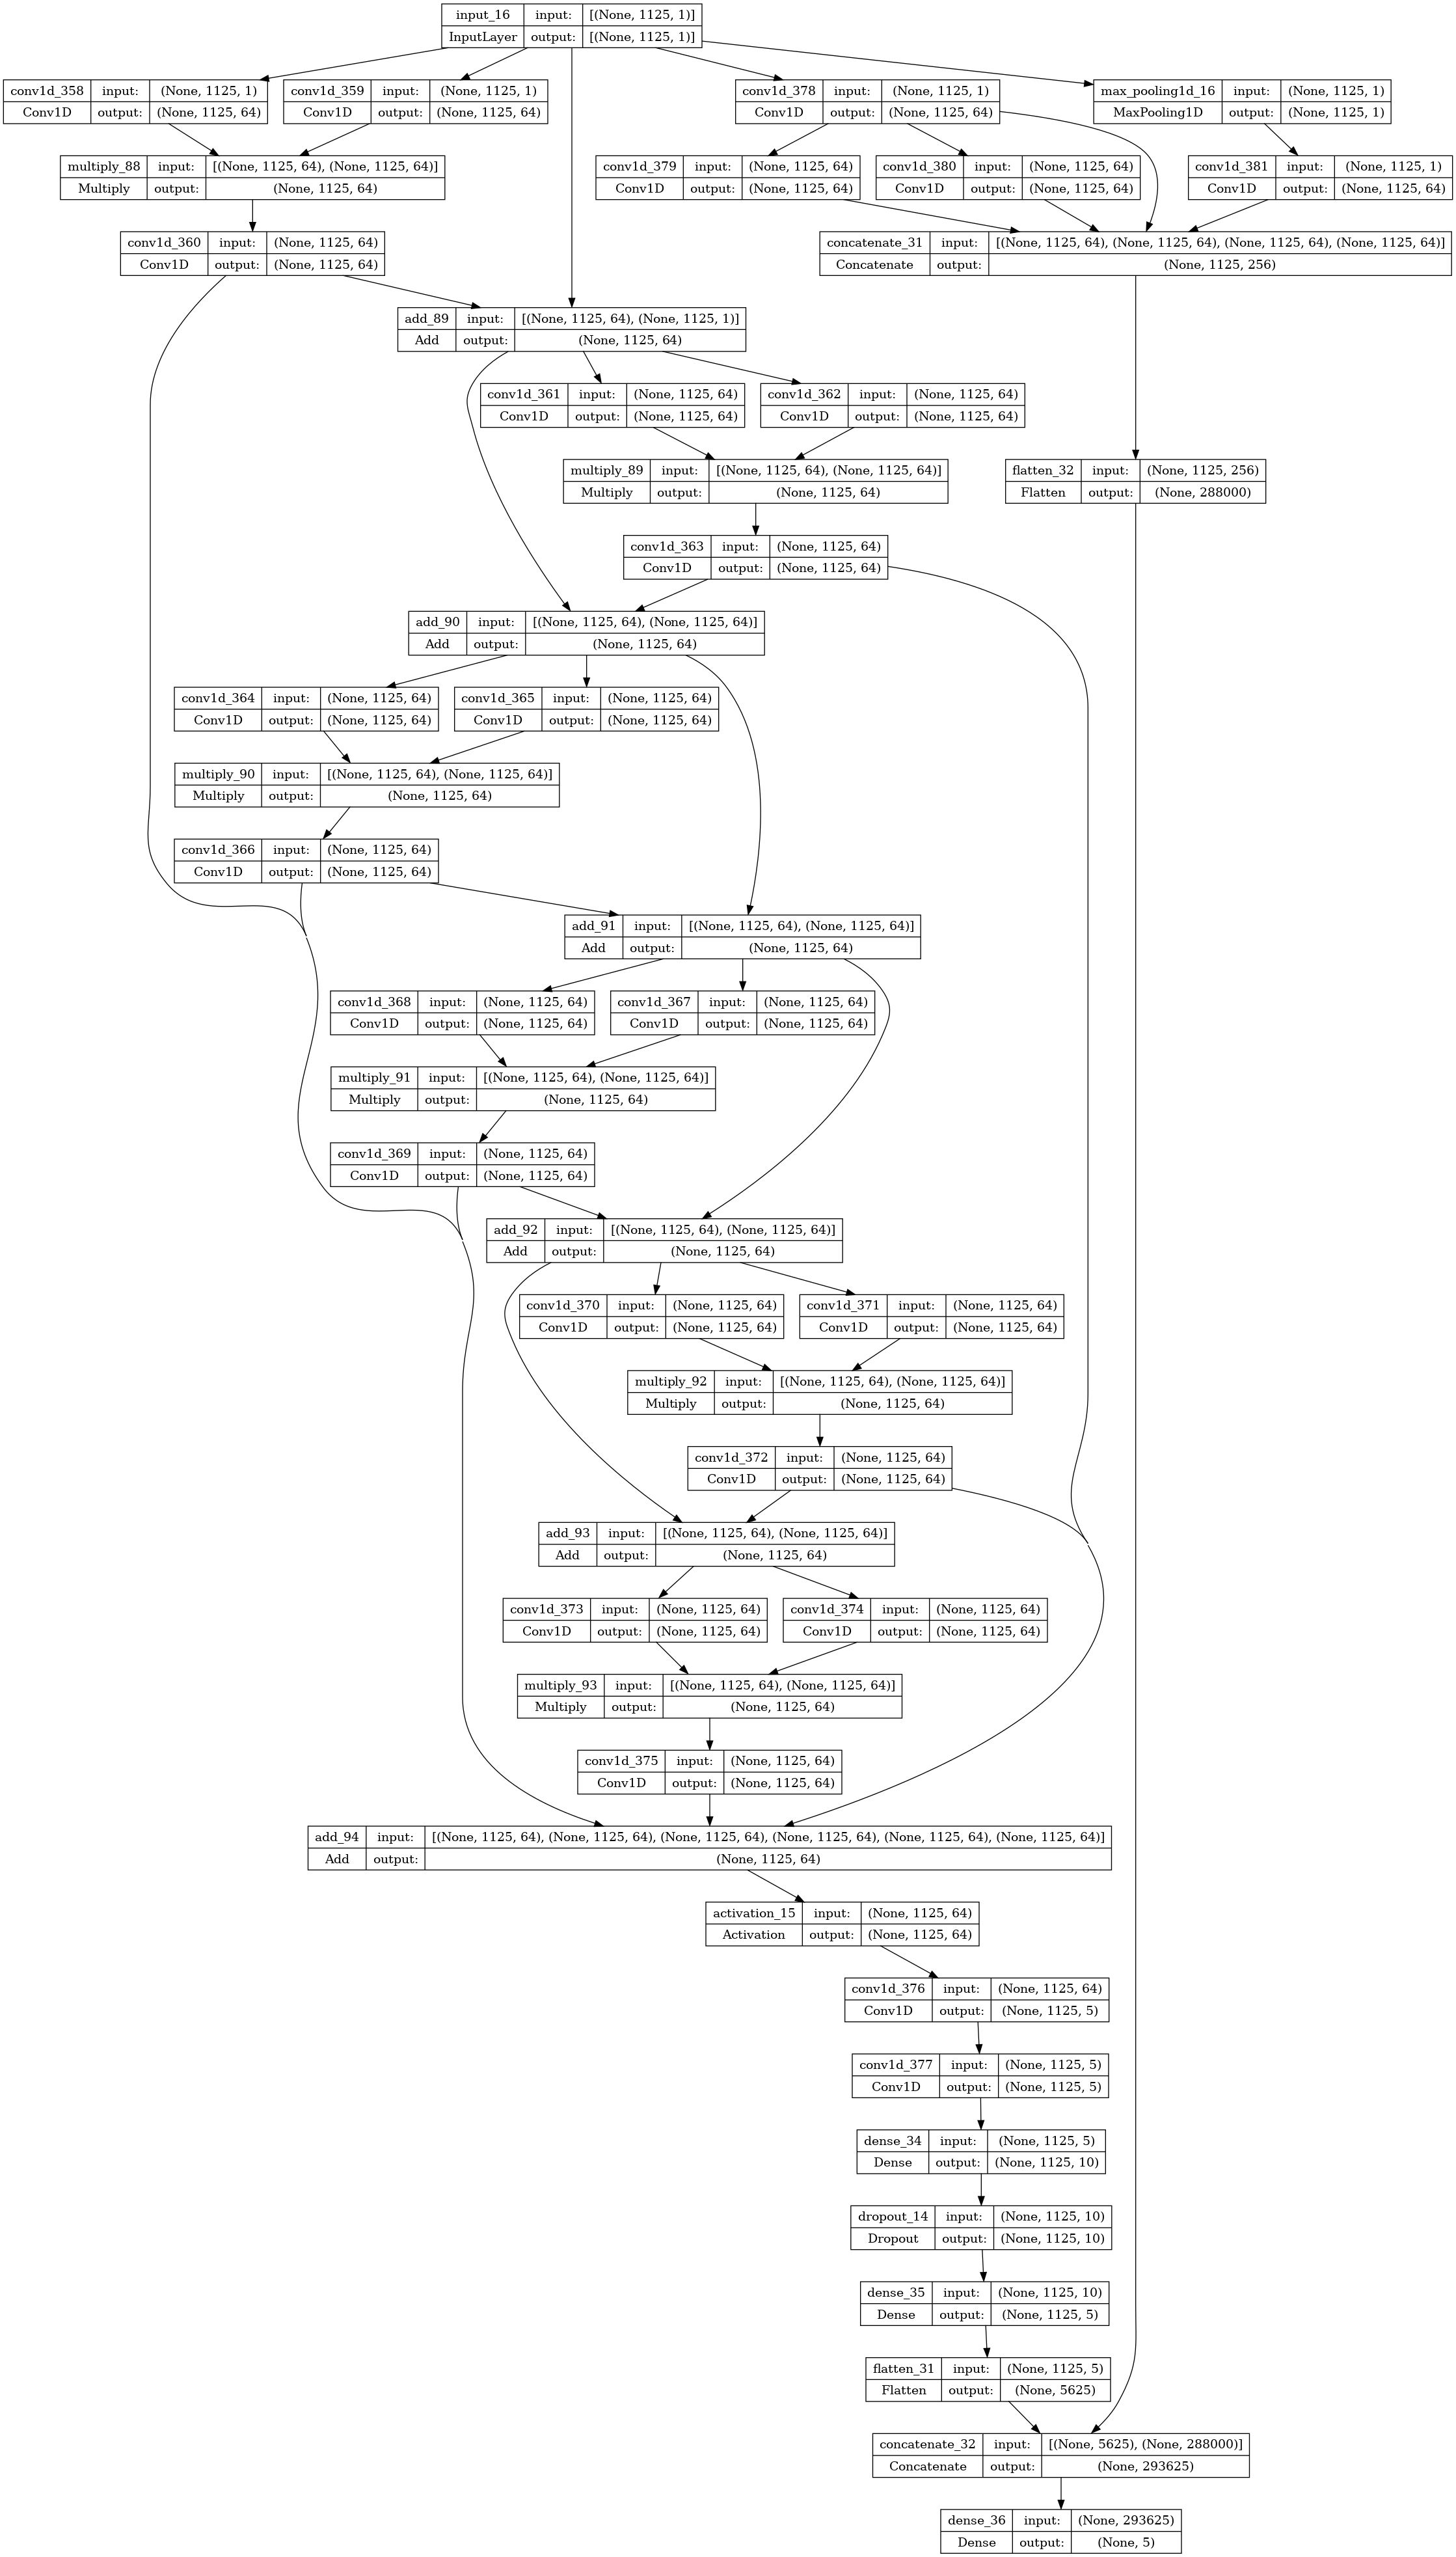

In [243]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)


In [244]:
import pickle  # data from razeen

# Load the arrays from the pickle file
with open('/kaggle/input/1125s-heart-sound-data-tvt-split-acc-985/split_98_5.pkl', 'rb') as f:
    data = pickle.load(f)

x_train = data['x_train']
x_test = data['x_test']
x_val = data['x_val']
y_train = data['y_train']
y_test = data['y_test']
y_val = data['y_val']

In [245]:
y_train

array([4, 0, 3, 0, 2, 4, 3, 1, 1, 3, 3, 2, 1, 1, 0, 4, 4, 1, 4, 4, 3, 1,
       3, 3, 4, 3, 2, 1, 3, 3, 1, 1, 2, 3, 4, 1, 0, 3, 2, 2, 4, 4, 2, 3,
       2, 1, 1, 3, 3, 1, 4, 3, 1, 4, 0, 0, 4, 4, 1, 0, 2, 4, 4, 3, 2, 4,
       0, 4, 4, 2, 1, 2, 2, 1, 0, 1, 0, 4, 4, 1, 2, 0, 1, 0, 3, 1, 3, 3,
       4, 3, 1, 3, 0, 1, 0, 3, 0, 0, 4, 4, 1, 3, 1, 2, 0, 4, 0, 2, 3, 1,
       1, 2, 1, 1, 1, 3, 3, 0, 0, 1, 1, 4, 4, 3, 1, 3, 2, 1, 1, 4, 2, 0,
       4, 2, 0, 2, 1, 0, 3, 0, 3, 0, 3, 4, 2, 1, 4, 0, 4, 4, 0, 1, 0, 3,
       2, 2, 0, 1, 4, 3, 0, 0, 0, 1, 4, 1, 1, 3, 0, 1, 4, 4, 2, 3, 2, 2,
       0, 3, 4, 1, 0, 0, 4, 0, 0, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2, 3, 0, 0,
       3, 1, 1, 4, 4, 4, 0, 2, 4, 2, 2, 3, 4, 2, 0, 2, 3, 0, 0, 1, 1, 1,
       0, 1, 2, 3, 1, 3, 0, 3, 4, 2, 3, 4, 1, 4, 3, 0, 1, 4, 3, 0, 3, 0,
       4, 2, 0, 3, 3, 0, 2, 1, 0, 2, 2, 0, 2, 1, 3, 1, 1, 4, 4, 3, 2, 3,
       2, 0, 2, 2, 4, 2, 0, 3, 1, 1, 4, 4, 0, 4, 2, 4, 2, 0, 0, 1, 1, 2,
       0, 2, 4, 1, 1, 2, 4, 4, 1, 2, 3, 0, 0, 1, 4,

In [246]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                   
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

checkpoint_path = 'best.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

import numpy as np
# from focal_loss import SparseCategoricalFocalLoss
from sklearn.model_selection import train_test_split

# Train the model
batch_size = 100

epochs = 100

history = model.fit(x_train, y_train,callbacks=[checkpoint],validation_split=0.2,epochs=epochs ,class_weight=class_weights, batch_size=batch_size)


Epoch 1/100
31/32 [============================>.] - ETA: 0s - loss: 0.8936 - accuracy: 0.6653
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to best.h5
32/32 [==============================] - 11s 49ms/step - loss: 0.8898 - accuracy: 0.6719 - val_loss: 0.7499 - val_accuracy: 0.7500
Epoch 2/100
31/32 [============================>.] - ETA: 0s - loss: 0.2325 - accuracy: 0.9113
Epoch 2: val_accuracy improved from 0.75000 to 0.85156, saving model to best.h5
32/32 [==============================] - 1s 26ms/step - loss: 0.2289 - accuracy: 0.9102 - val_loss: 0.6189 - val_accuracy: 0.8516
Epoch 3/100
31/32 [============================>.] - ETA: 0s - loss: 0.0908 - accuracy: 0.9758
Epoch 3: val_accuracy improved from 0.85156 to 0.86719, saving model to best.h5
32/32 [==============================] - 1s 26ms/step - loss: 0.0941 - accuracy: 0.9766 - val_loss: 0.6886 - val_accuracy: 0.8672
Epoch 4/100
31/32 [============================>.] - ETA: 0s - loss: 0.0514 - accuracy:

In [251]:
# Evaluate the model
best_model = tf.keras.models.load_model('/kaggle/working/best.h5')
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

7/7 [==============================] - 1s 14ms/step - loss: 0.4342 - accuracy: 0.9150
Test loss: 0.4342
Test accuracy: 0.9150


In [252]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

class_names = list(['Aortic Stenosis','Mitral Regurgitation','Mitral Stenosis','Mitral Valve Prolapse', 'Normal'])

# Get the true labels and predicted probabilities for the test data
# Make predictions
predictions = best_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(y_test, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

7/7 [==============================] - 1s 11ms/step
Classification Report:
                        precision    recall  f1-score   support

      Aortic Stenosis       0.95      0.95      0.95        41
 Mitral Regurgitation       0.84      0.93      0.88        44
      Mitral Stenosis       0.91      0.88      0.90        34
Mitral Valve Prolapse       0.89      0.84      0.86        38
               Normal       1.00      0.95      0.98        43

             accuracy                           0.92       200
            macro avg       0.92      0.91      0.91       200
         weighted avg       0.92      0.92      0.92       200



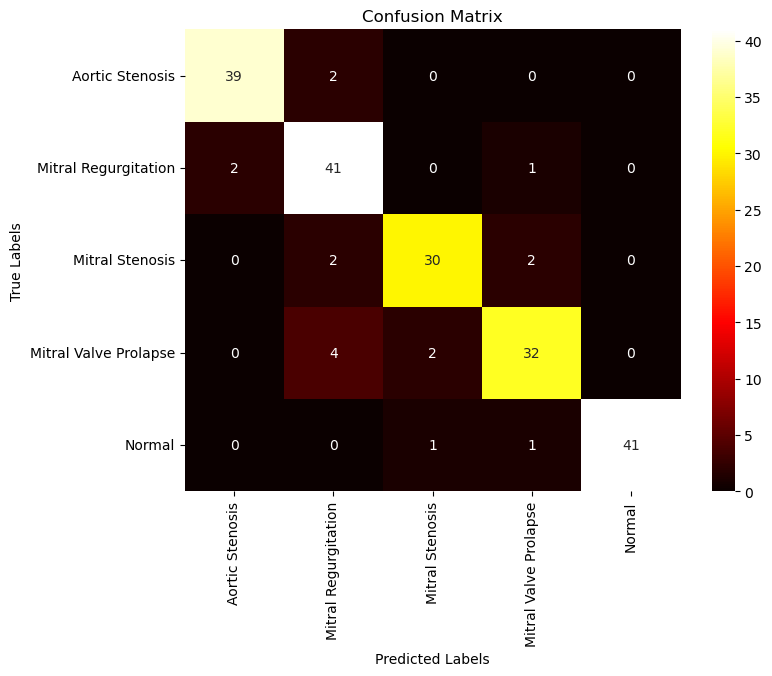

In [253]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="hot", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

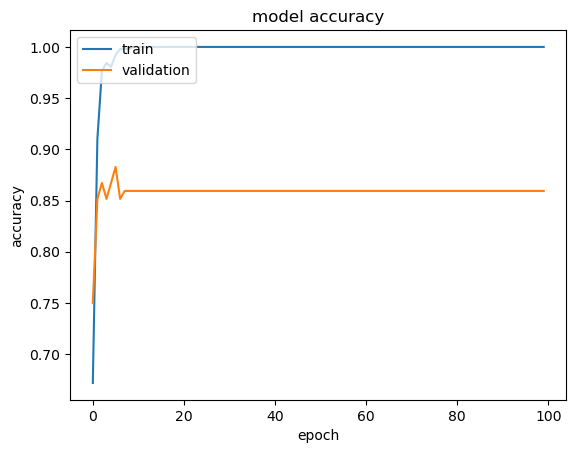

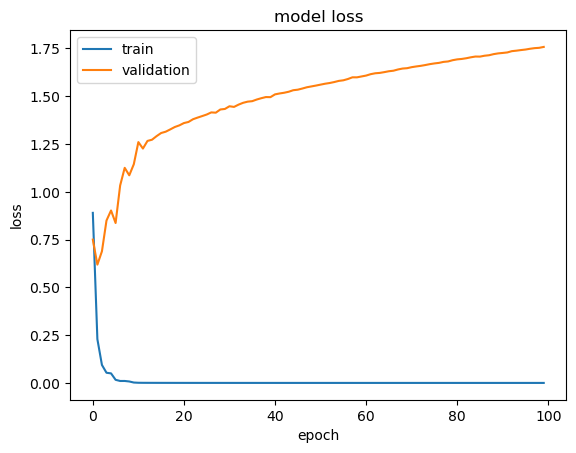

In [254]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()